In [2]:
import pandas
import matplotlib.pyplot as plt
import seaborn as sea
import numpy as np
from sklearn.metrics import classification_report
target_names = ['class 1', 'class 2', 'class 3']
filename = 'IRIS1.csv'
data = pandas.read_csv(filename)
print(data.shape)
X=data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
Y=data.species
Xtrain=np.concatenate((np.array(X[0:40]), np.array(X[50:90]), np.array(X[100:140])))
Ytrain=np.concatenate((np.array(Y[0:40]), np.array(Y[50:90]), np.array(Y[100:140])))
Xtest=np.concatenate((np.array(X[40:50]), np.array(X[90:100]), np.array(X[140:150])))
Ytest=np.concatenate((np.array(Y[40:50]), np.array(Y[90:100]), np.array(Y[140:150])))


(150, 6)


In [10]:
count1=0
count2=0
count3=0
for i in data['species']:
    if(int(i)==1):
        count1=count1+1
    elif(int(i)==2):
        count2=count2+1
    else:
        count3=count3+1

print("Iris-virginica",count1,"\nIris-versicolor",count2,"\nIris-setosa",count3)

Iris-virginica 50 
Iris-versicolor 50 
Iris-setosa 50


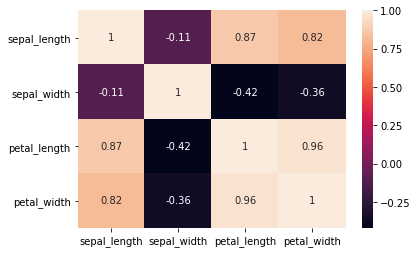

In [11]:
sea.heatmap(data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].corr(),annot=True)
plt.show()

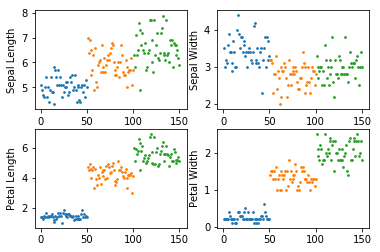

In [12]:
plt.subplot(2,2,1)
plt.scatter(data.Id[0:50],data.sepal_length[0:50],s=3)
plt.scatter(data.Id[50:100],data.sepal_length[50:100],s=3)
plt.scatter(data.Id[100:150],data.sepal_length[100:150],s=3)
plt.ylabel("Sepal Length")

plt.subplot(2,2,2)
plt.scatter(data.Id[0:50],data.sepal_width[0:50],s=3)
plt.scatter(data.Id[50:100],data.sepal_width[50:100],s=3)
plt.scatter(data.Id[100:150],data.sepal_width[100:150],s=3)
plt.ylabel("Sepal Width")

plt.subplot(2,2,3)
plt.scatter(data.Id[0:50],data.petal_length[0:50],s=3)
plt.scatter(data.Id[50:100],data.petal_length[50:100],s=3)
plt.scatter(data.Id[100:150],data.petal_length[100:150],s=3)
plt.ylabel("Petal Length")

plt.subplot(2,2,4)
plt.scatter(data.Id[0:50],data.petal_width[0:50],s=3)
plt.scatter(data.Id[50:100],data.petal_width[50:100],s=3)
plt.scatter(data.Id[100:150],data.petal_width[100:150],s=3)
plt.ylabel("Petal Width")
plt.show()

In [36]:
X=data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
Y=data.species

1.0


In [9]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB
#print(Xtest)
clf=GaussianNB()
clf.fit(Xtrain, Ytrain)
y=clf.predict(Xtest)#print(Xtest, Ytest)
#print(clf.score(X[120:150] ,y, sample_weight=None))
print(classification_report(Ytest, y, target_names=target_names))
print(y)

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        10
     class 2       1.00      1.00      1.00        10
     class 3       1.00      1.00      1.00        10

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3]


In [105]:
#K-Means Clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(Xtrain)
y=kmeans.predict(Xtest)+1
print(classification_report(Ytest, y, target_names=target_names))
print(y)

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        10
     class 2       0.00      0.00      0.00        10
     class 3       0.23      0.30      0.26        10

   micro avg       0.43      0.43      0.43        30
   macro avg       0.41      0.43      0.42        30
weighted avg       0.41      0.43      0.42        30

[1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 2 2 3 2 2 2 3 2 2 3]


In [12]:
#Support Vector Machines
from sklearn import svm
clf = svm.SVC(gamma='scale')
clf.fit(Xtrain, Ytrain)
y=clf.predict(Xtest)
print(classification_report(Ytest, y, target_names=target_names))
print(y)

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        10
     class 2       1.00      1.00      1.00        10
     class 3       1.00      1.00      1.00        10

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3]


In [107]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, solver='lbfgs', max_iter=500, multi_class='multinomial').fit(Xtrain, Ytrain)
y=clf.predict(Xtest)
print(classification_report(Ytest, y, target_names=target_names))
print(y)

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        10
     class 2       1.00      1.00      1.00        10
     class 3       1.00      1.00      1.00        10

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3]


In [10]:
#Multilayer Preceptron
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(5, 3), random_state=1)
clf.fit(Xtrain, Ytrain)
y=clf.predict(Xtest)
print(classification_report(Ytest, y, target_names=target_names))
print(y)

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        10
     class 2       1.00      1.00      1.00        10
     class 3       1.00      1.00      1.00        10

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3]


In [110]:
#Decision Trees
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(Xtrain, Ytrain)
y=clf.predict(Xtest)
print(classification_report(Ytest, y, target_names=target_names))
print(y)

              precision    recall  f1-score   support

     class 1       1.00      1.00      1.00        10
     class 2       1.00      1.00      1.00        10
     class 3       1.00      1.00      1.00        10

   micro avg       1.00      1.00      1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3]


In [13]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB().fit(X,Y)
import pickle
#allows to serialize python object into a file
with open('gnb_iris_pickle','wb') as f:
    pickle.dump(gnb,f)

In [7]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state=0, solver='lbfgs', max_iter=500, multi_class='multinomial').fit(X, Y)
with open('log_iris_pickle','wb') as f:
    pickle.dump(log,f)

In [8]:
from sklearn import svm
svm = svm.SVC(gamma='scale')
svm.fit(X, Y)
with open('svm_iris_pickle','wb') as f:
    pickle.dump(svm,f)